Installing libraries, please wait unil finished

In [17]:
%pip install -q ipywidgets
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Importing libraries

In [18]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# supress warning from pandas
pa.options.mode.chained_assignment = None

## Preparing data

In [19]:
videogames_df = pa.read_csv('./Video_Games_Sales_as_at_22_Dec_2016.csv')
videogames_df_filtered = videogames_df[['Name', 'Platform', 'Global_Sales', 'Genre', 'Critic_Score', 'User_Score', 'Year_of_Release']]

videogames_df_filtered.dropna(subset=['Name', 'Platform', 'Global_Sales', 'Genre', 'Critic_Score', 'User_Score', 'Year_of_Release'], axis=0, inplace=True)
videogames_df_filtered = videogames_df_filtered.reset_index(drop=True)

videogames_df_filtered['User_Score'] = np.where(videogames_df_filtered['User_Score'] == 'tbd', np.nan, videogames_df_filtered['User_Score']).astype(float)

## Score Distribution by Genre using boxplot

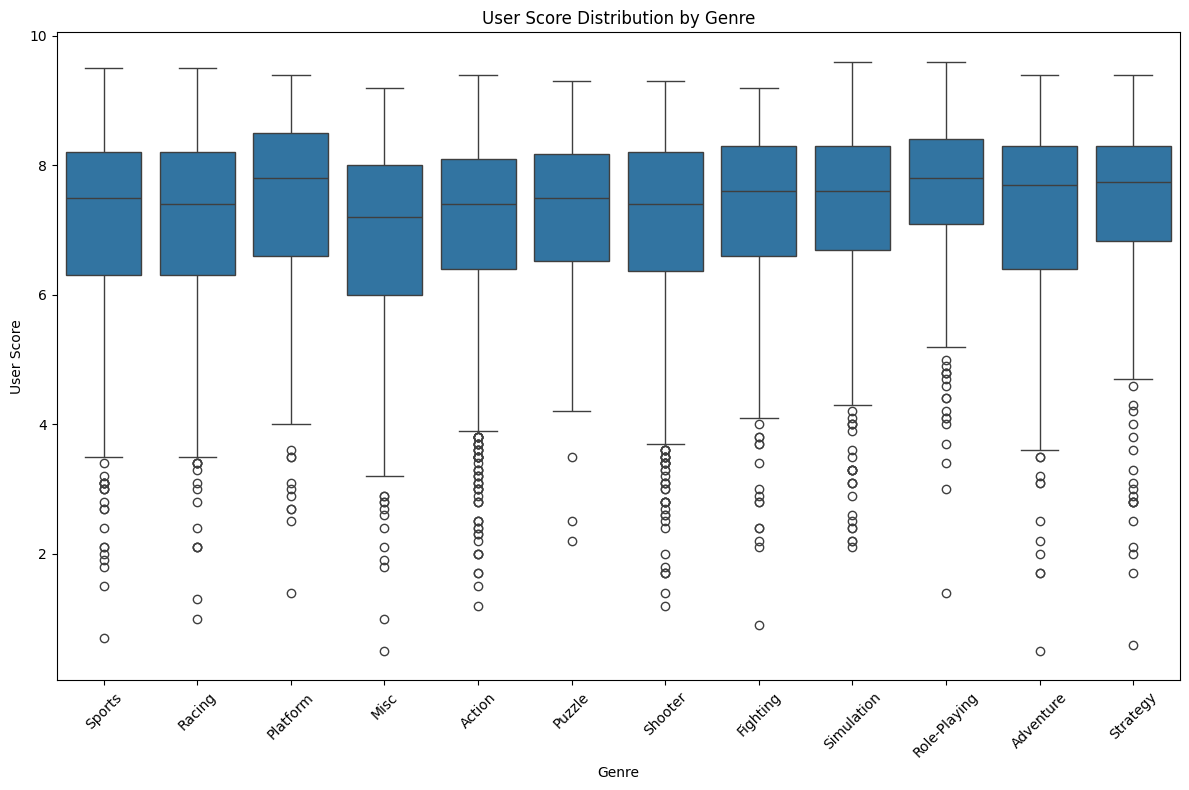

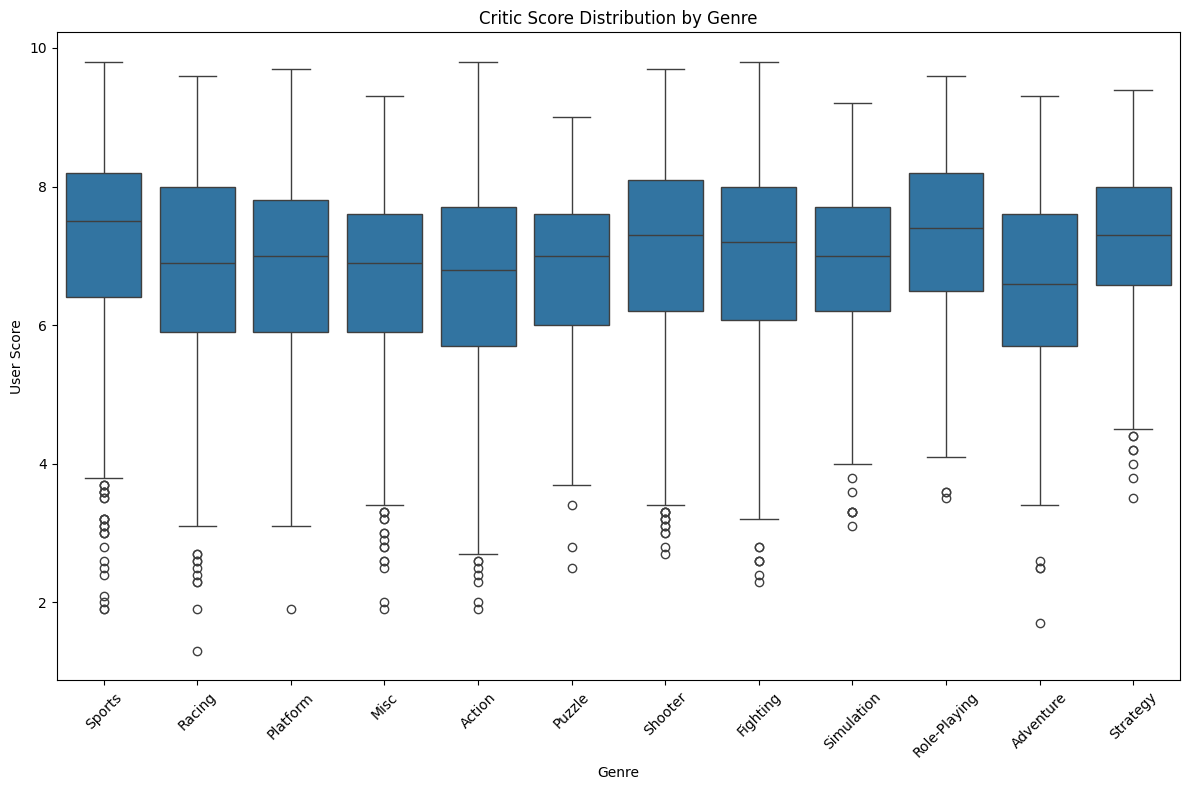

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='User_Score', data=videogames_df_filtered)
plt.title('User Score Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('User Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

videogames_df_filtered['Critic_Score'] = videogames_df_filtered['Critic_Score'] / 10
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='Critic_Score', data=videogames_df_filtered)
plt.title('Critic Score Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('User Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Sales by Genre & Platform using heatmap

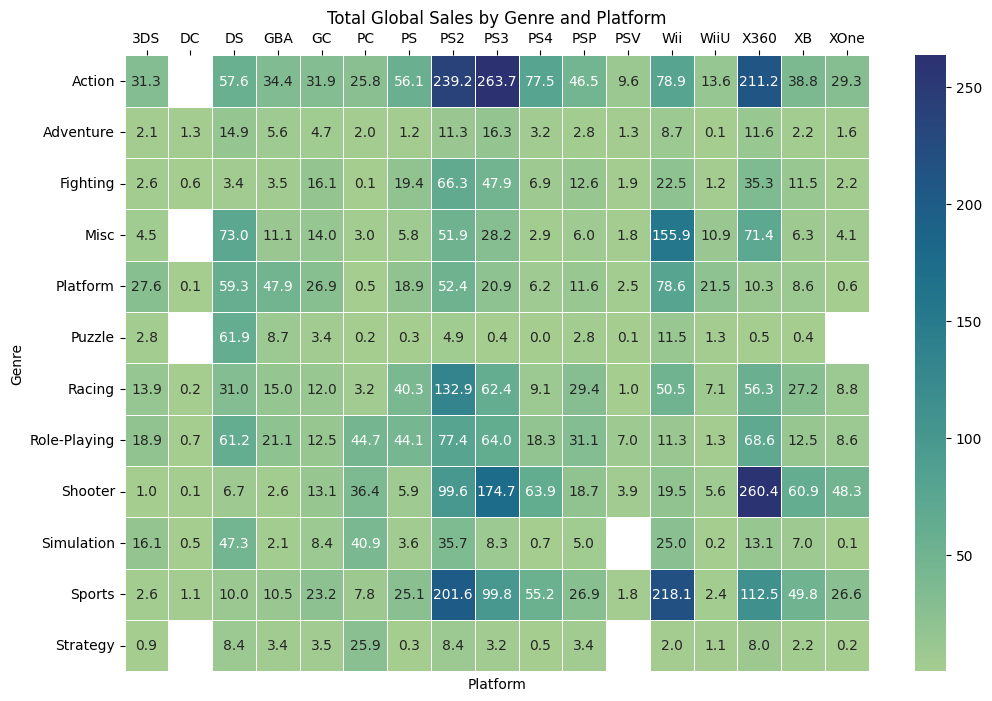

In [21]:
sales = videogames_df_filtered.pivot_table(index='Genre', columns='Platform', values='Global_Sales', aggfunc='sum')

# Creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sales, cmap="crest", annot=True, fmt=".1f", linewidths=0.5).xaxis.tick_top()
plt.title('Total Global Sales by Genre and Platform')
plt.xlabel('Platform')
plt.ylabel('Genre')
plt.show()

## Distribution of Platforms using bar plot

Text(0.5, 1.0, 'Distribution of Platforms')

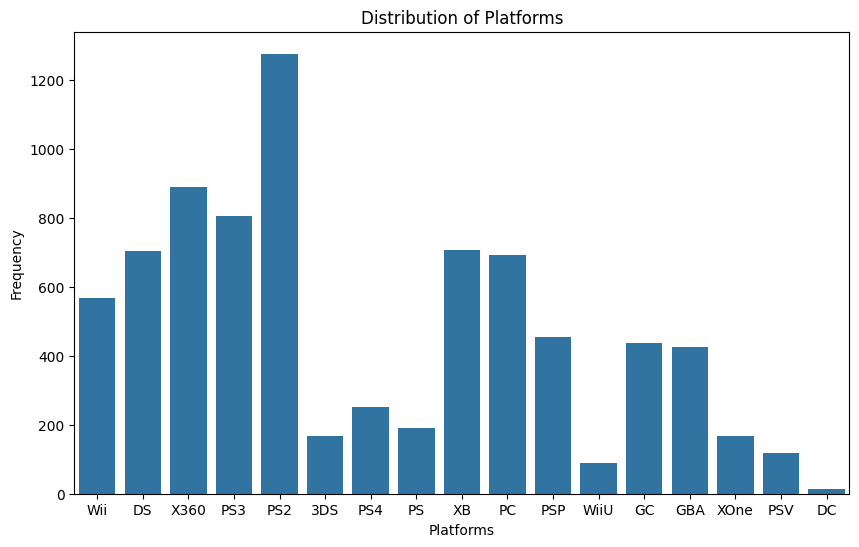

In [22]:
plt.figure(figsize = (10,6))
sns.countplot(data=videogames_df_filtered, x='Platform')
plt.xlabel("Platforms")
plt.ylabel('Frequency')
plt.title("Distribution of Platforms")